In [73]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [9]:
mnist = fetch_openml('mnist_784',version=1,as_frame=False)

In [11]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [61]:
df = pd.DataFrame(mnist.data,columns=mnist.feature_names)

In [63]:
df['target'] = mnist.target

In [64]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [65]:
df.dtypes

pixel1      float64
pixel2      float64
pixel3      float64
pixel4      float64
pixel5      float64
             ...   
pixel781    float64
pixel782    float64
pixel783    float64
pixel784    float64
target       object
Length: 785, dtype: object

In [76]:
X,y = mnist['data'],mnist['target']

In [77]:
X1 = mnist["data"]

In [78]:
X.shape

(70000, 784)

In [79]:
y.shape

(70000,)

In [80]:
some_digit = X[0]

In [81]:
some_digit_image = some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

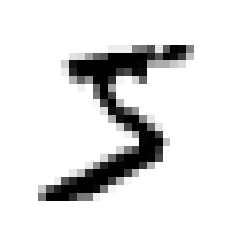

In [82]:
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')

In [83]:
y[0]

'5'

In [84]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [85]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [86]:
y_train_5[0]

True

In [87]:
sgd_clf = SGDClassifier(random_state=42)

In [88]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [89]:
sgd_clf.predict([X[5]])

array([False])

In [90]:
cross_val_score(sgd_clf,X_train,y_train,cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [91]:
from sklearn.model_selection import cross_val_predict

In [93]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [100]:
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [101]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [102]:
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [103]:
y_score = sgd_clf.decision_function([X[0]])

In [104]:
y_score

array([2164.22030239])

In [161]:
y_some_digit_pred = (y_score>treshold)

In [162]:
y_some_digit_pred

array([False])

In [163]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,method='decision_function')

In [164]:
from sklearn.metrics import precision_recall_curve

In [165]:
precisions,recalls,threshold = precision_recall_curve(y_train_5,y_scores)

In [174]:
def plot_precision_recall_vs_treshold(precisions, recalls, tresholds):
    plt.plot(treshold, precisions[:-1],'b--',label='Precision')
    plt.plot(treshold, recalls[:-1],'g-',label='Recall')


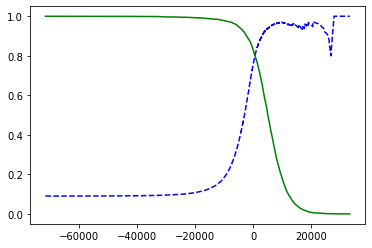

In [176]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [192]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]

In [193]:
treshold_90_precision

-71657.12621733556

In [194]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [195]:
precision_score(y_train_5,y_train_pred_90)

0.9002016129032258

In [196]:
from sklearn.metrics import roc_curve

In [197]:
fpr, tpr, tresholds = roc_curve(y_train_5,y_scores)

def plot_roc_curve(fpr,trp,label= None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.grid()
    plt.figure(figsize=(30,25))

plot_roc_curve(fpr,tpr)
plt.show()

In [257]:
from sklearn.metrics import roc_auc_score

In [258]:
roc_auc_score(y_train_5,y_scores)

0.9648211175804801

In [259]:
from sklearn.ensemble import RandomForestClassifier

In [260]:
forest_clf = RandomForestClassifier(random_state=42)

In [261]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5, cv= 3, method='predict_proba')


In [265]:
y_scores_forest = y_probas_forest[:, 1]

In [266]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [269]:
from sklearn.svm import SVC

In [270]:
svm_clf = SVC()

In [271]:
svm_clf.fit(X_train,y_train)

SVC()

In [272]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [285]:
svm_clf.predict([X[129]])

array(['6'], dtype=object)

In [286]:
df.target[129]

'6'

In [293]:
X[:,20]

array([0., 0., 0., ..., 0., 0., 0.])

In [300]:
X[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [310]:
for x in X[:20]:
    z = svm_clf.predict([x])
    print(z)

['5']
['0']
['4']
['1']
['9']
['2']
['1']
['3']
['1']
['4']
['3']
['5']
['3']
['6']
['1']
['7']
['2']
['8']
['6']
['9']
